In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import math
df = pd.read_csv('promo_order_data.csv')
df.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,promo_amount,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52.0,36.0,52.0,350.70,0.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,52.0
1,2021-01-01,7,248.0,104.0,250.0,2372.48,2.0,NaN,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0.0,248.0
2,2021-01-01,8,584.0,168.0,594.0,6651.32,4.0,NaN,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0.0,584.0
3,2021-01-01,9,786.0,196.0,812.0,9350.64,10.0,NaN,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0.0,786.0
4,2021-01-01,10,894.0,200.0,924.0,10956.32,8.0,NaN,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0.0,894.0



# Customer and Order Activity

In [7]:
# the number of customers
# Calculate the number of customers and orders with promo
num_customers = df['customers'].sum()
num_vendors = df['vendors'].sum()
num_orders = df['orders'].sum()
num_promo_count = df['promo_count'].sum()

# Display the result
print("Number of customers:", num_customers)
print("Number of vendors:", num_vendors)
print("Number of orders:",num_orders)
print("Number of orders with promo:", num_promo_count)

Number of customers: 3400700.0
Number of vendors: 965260.0
Number of orders: 3458500.0
Number of orders with promo: 71726.0


In [11]:
avg_customers = df['customers'].mean()

print("Average total customerscustomers:", math.ceil(avg_customers))

Average total customerscustomers: 1369


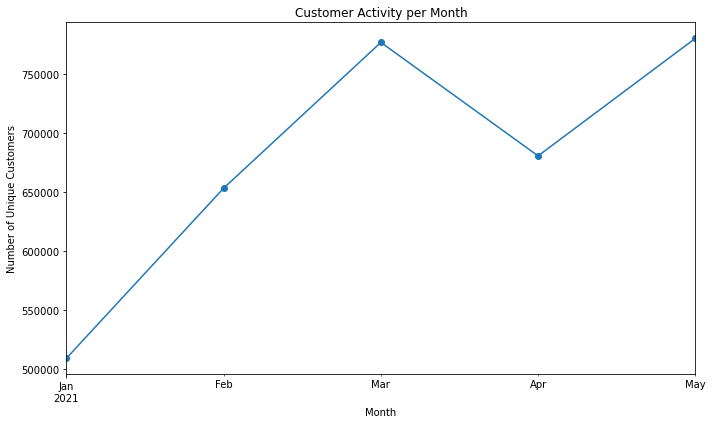

In [3]:
#customer activity per month

# Convert Trans_date column to datetime
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Extract year and month from Trans_date
df['yearMonth'] = df['trans_date'].dt.to_period('M')

# Calculate the sum of unique customers per month
customers_per_month = df.groupby('yearMonth')['customers'].sum()

# Plotting the results
plt.figure(figsize=(10, 6))

customers_per_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.title('Customer Activity per Month')

plt.tight_layout()
plt.show()

<Figure size 864x432 with 0 Axes>

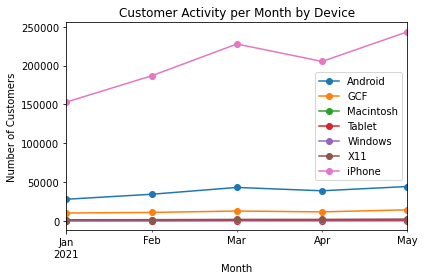

In [4]:
#Customer Activity per Month by Devices

# Convert Trans_date column to datetime
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Extract year and month from Trans_date
df['yearMonth'] = df['trans_date'].dt.to_period('M')

# Group the data by YearMonth and calculate the sum of customers for each devices
customer_per_device_month = df.groupby('yearMonth')[['Android', 'GCF', 'Macintosh', 'Tablet', 'Windows', 'X11', 'iPhone']].sum()

# Plotting the results
plt.figure(figsize=(12, 6))

customer_per_device_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Customers')
plt.title('Customer Activity per Month by Device')

plt.tight_layout()
plt.show()

List of device counts
Android       188930.0
GCF            60298.0
Macintosh       3664.0
Tablet          1970.0
Windows         7702.0
X11             9858.0
iPhone       1016674.0
dtype: float64


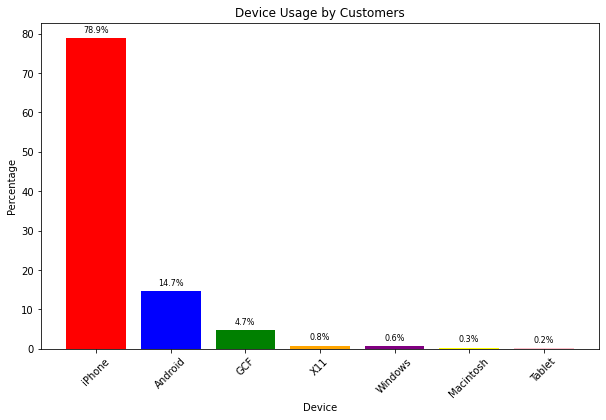

In [10]:
#Total device usage by customers

# Calculate the total users of each devices
device_counts = df[['Android', 'GCF', 'Macintosh', 'Tablet', 'Windows', 'X11', 'iPhone']].sum()

print("List of device counts")
print(device_counts)

# Calculate the total count of all devices
total_count = device_counts.sum()

# Calculate the percentage of each device
device_percentages = (device_counts / total_count) * 100

# Sort the device percentages in descending order
sorted_device_percentages = device_percentages.sort_values(ascending=False)

# for the colors of the columns in the graph 
color_palette = ['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink']

# Plot the bar graph with custom colors
plt.figure(figsize=(10, 6))
plt.bar(sorted_device_percentages.index, sorted_device_percentages.values, color=color_palette)
plt.xlabel('Device')
plt.ylabel('Percentage')
plt.title('Device Usage by Customers')

# Add percentage labels to each bar
for i, v in enumerate(sorted_device_percentages.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)

plt.xticks(rotation=45)
plt.show()


iPhone       1016674.0
Android       188930.0
GCF            60298.0
X11             9858.0
Windows         7702.0
Macintosh       3664.0
Tablet          1970.0
dtype: float64 sorted device in desc
Device Percentages
iPhone     80.312220
Android    14.924536
GCF         4.763244
dtype: float64


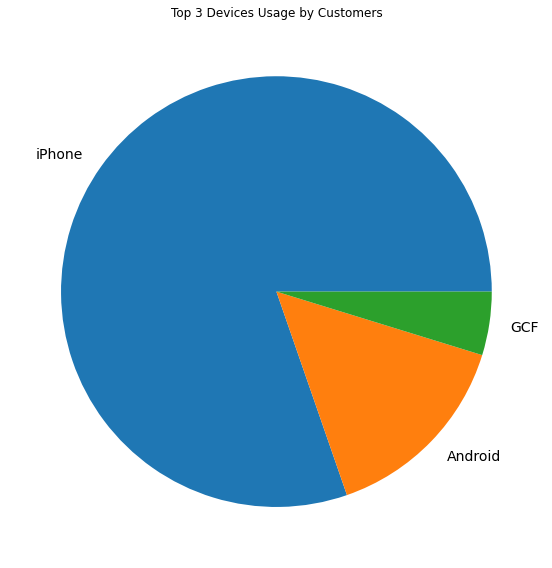

In [27]:
# Calculate the total users each device
device_counts = df[['Android', 'GCF', 'Macintosh', 'Tablet', 'Windows', 'X11', 'iPhone']].sum()

# Sort the device counts in descending order
sorted_device_counts = device_counts.sort_values(ascending=False)

print(sorted_device_counts,"sorted device in desc")

# Top 3 devices 
top_devices = sorted_device_counts.head(3)

# Calculate the total count of the top 3 devices
total_top_devices = top_devices.sum()

# Calculate the percentage of each top device
device_percentages = (top_devices / total_top_devices) * 100
print("Device Percentages")
print(device_percentages)

# Plotting the pie chart
plt.figure(figsize=(8, 8))

# Create a pie chart with larger label font size
plt.pie(device_percentages, labels=device_percentages.index,textprops={'fontsize': 14})

plt.title('Top 3 Devices Usage by Customers')

plt.tight_layout()
plt.show()

<Figure size 864x432 with 0 Axes>

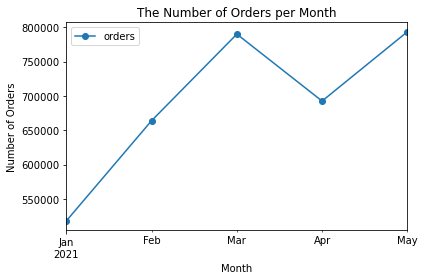

In [30]:
#Order Activity per month
# Convert Trans_date column to datetime
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Extract year and month from Trans_date
df['yearMonth'] = df['trans_date'].dt.to_period('M')

# Group the data by YearMonth and calculate the sum of orders with promo
customer_per_device_month = df.groupby('yearMonth')[['orders']].sum()

# Plotting the results
plt.figure(figsize=(12, 6))

customer_per_device_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('The Number of Orders per Month')

plt.tight_layout()
plt.show()

<Figure size 864x432 with 0 Axes>

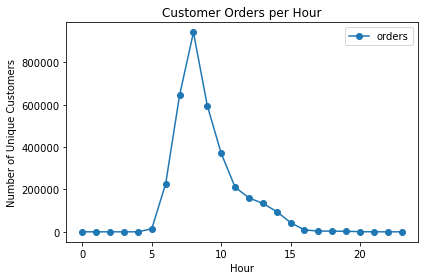

In [57]:
# Group the data by hour and their orders
orders_per_hour = df.groupby('trans_hour')[['orders']].sum()

# Plotting the results
plt.figure(figsize=(12, 6))

orders_per_hour.plot(kind='line', marker='o')
plt.xlabel('Hour')
plt.ylabel('Number of Unique Customers')
plt.title('Customer Orders per Hour')

plt.tight_layout()
plt.show()

<Figure size 864x432 with 0 Axes>

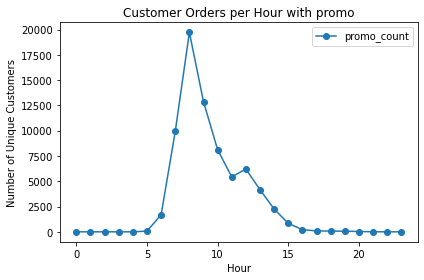

In [58]:
# Group the data by hour and their orders with promos
orders_per_hour = df.groupby('trans_hour')[['promo_count']].sum()

# Plotting the results
plt.figure(figsize=(12, 6))

orders_per_hour.plot(kind='line', marker='o')
plt.xlabel('Hour')
plt.ylabel('Number of Unique Customers')
plt.title('Customer Orders per Hour with promo')

plt.tight_layout()
plt.show()

# Blocklisted Segment

In [24]:
# Calculate the number of customers blacklisted and not blacklisted
num_customers_blocklisted = df['Blacklisted'].sum()
num_customers_not_blocklisted = df['Not Blacklisted'].sum()

# Calculate the total number of customers
total_customers = num_customers_blocklisted + num_customers_not_blocklisted

# Calculate the percentage of blacklisted and not blacklisted customers
percentage_blocklisted = (num_customers_blocklisted / total_customers) * 100
percentage_not_blocklisted = (num_customers_not_blocklisted / total_customers) * 100

# Display the result
print("Total customers:", total_customers)
print("Number of blacklisted customers:", num_customers_blocklisted)
print("Number of not blacklisted customers:", num_customers_not_blocklisted)
print("Percentage of blacklisted customers: {:.2f}%".format(percentage_blocklisted))
print("Percentage of not blacklisted customers: {:.2f}%".format(percentage_not_blocklisted))


Total customers: 3400700.0
Number of blacklisted customers: 306.0
Number of not blacklisted customers: 3400394.0
Percentage of blacklisted customers: 0.01%
Percentage of not blacklisted customers: 99.99%


<Figure size 864x432 with 0 Axes>

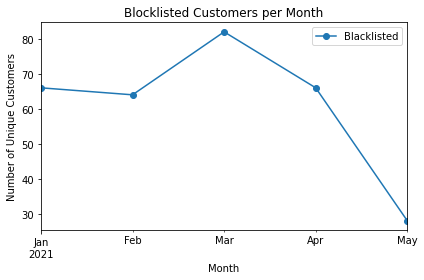

In [28]:

df['trans_date'] = pd.to_datetime(df['trans_date'])


df['yearMonth'] = df['trans_date'].dt.to_period('M')

# Group the data by YearMonth and calculate the sum of blocklisted customers
blacklisted_per_month = df.groupby('yearMonth')[['Blacklisted']].sum()

#Results in graph 
plt.figure(figsize=(12, 6))

blacklisted_per_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')
plt.title('Blocklisted Customers per Month')

plt.tight_layout()
plt.show()

# With Promos

           promo_count
yearMonth             
2021-01         8000.0
2021-02        14238.0
2021-03        16830.0
2021-04        16382.0
2021-05        16276.0


<Figure size 864x432 with 0 Axes>

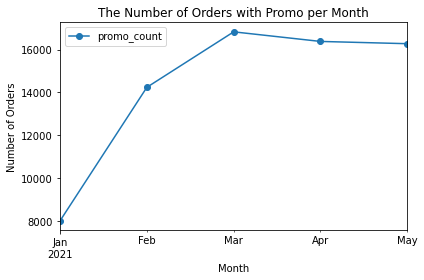

In [15]:
#Order Activity with promos per month

df['trans_date'] = pd.to_datetime(df['trans_date'])


df['yearMonth'] = df['trans_date'].dt.to_period('M')

# Group the data by YearMonth and calculate the sum of orders with promo
promo_orders = df.groupby('yearMonth')[['promo_count']].sum()

print(promo_orders)

#Results in graph
plt.figure(figsize=(12, 6))

promo_orders.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('The Number of Orders with Promo per Month')

plt.tight_layout()
plt.show()

             Orders with Promo  Orders without Promo
trans_month                                         
1                       8000.0              510236.0
2                      14238.0              649882.0
3                      16830.0              773278.0
4                      16382.0              676238.0
5                      16276.0              777140.0


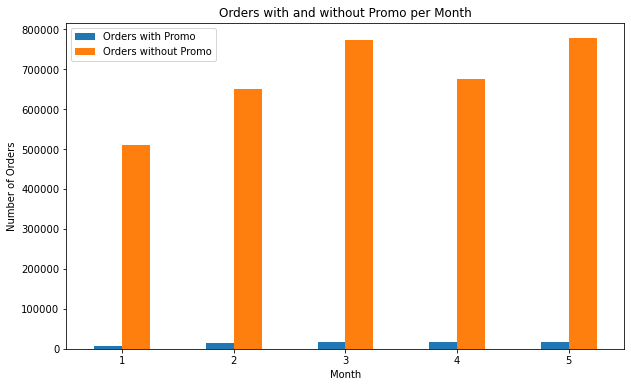

In [17]:
# Convert 'trans_date' column to datetime format
df['trans_date'] = pd.to_datetime(df['trans_date'])
df['trans_month'] = df['trans_date'].dt.month

# Calculate the total orders per month
total_orders_per_month = df.groupby('trans_month')['orders'].sum()

# Calculate the promo count per month
promo_count_per_month = df.groupby('trans_month')['promo_count'].sum()

# Calculate the orders without promo per month
orders_without_promo_per_month = total_orders_per_month - promo_count_per_month


# Create a new DataFrame with the data
orders_data = pd.DataFrame({
    'Orders with Promo': promo_count_per_month,
    'Orders without Promo': orders_without_promo_per_month
})

print(orders_data)

# Plot the graph
orders_data.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Orders with and without Promo per Month')
plt.xticks(rotation=0)
plt.legend()
plt.show()

<Figure size 864x432 with 0 Axes>

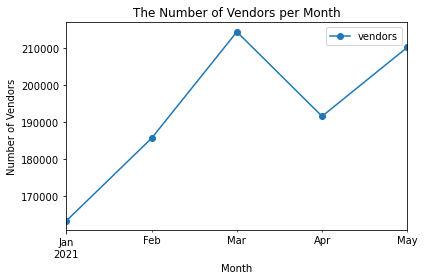

In [18]:
#Vendor Activity
# Convert Trans_date column to datetime
df['trans_date'] = pd.to_datetime(df['trans_date'])

# Extract year and month from Trans_date
df['yearMonth'] = df['trans_date'].dt.to_period('M')

# Group the data by YearMonth and calculate the vendors
vendors_month = df.groupby('yearMonth')[['vendors']].sum()

# Results in graph
plt.figure(figsize=(12, 6))

vendors_month.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Vendors')
plt.title('The Number of Vendors per Month')

plt.tight_layout()
plt.show()